In [45]:
import numpy as np               
import pandas as pd             
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns            # Statistical plotting
from scipy import stats
from palmerpenguins import load_penguins   # Penguin dataset

# Load data

In [5]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.shape

(244, 7)

# Defining Style and Context
Seaborn offers five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks. The default theme is darkgrid. Here we will set the white theme to make the plots aesthetically beautiful.

Plot elements can be scaled using set_context( ). The four preset contexts, in order of relative size, are paper, notebook, talk, and poster. The notebook style is the default. Here we are going to set it to paper and scale the font element to 2.


In [7]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)

# 1. Distribution Plots
All type of distribution plot can be plotted using displot( ) function. To change the plot type you just need to supply the kind = ` ` argument which supports histogram (hist), Kernel Density Estimate (KDE: kde) and Empirical Cumulative Distribution Function (ECDF: ecdf).


<h2>1.1 Histogram</h2>
We can plot a histogram using the displot( ) function by supplying kind = “hist”. We can also supply the bins argument as per our requirement. I have set the aspect ratio to 1.5 to make the plot a little bit wider.


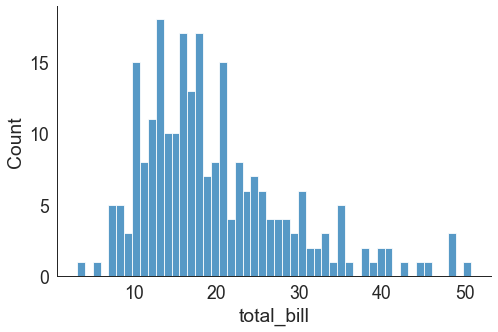

In [9]:
sns.displot(data=tips, x="total_bill", kind="hist", bins = 50, aspect = 1.5)

<h2>1.2 Histogram + KDE</h2>
We can plot a histogram + KDE (overlaid) using the displot( ) function by supplying kind = “hist” and kde = True.


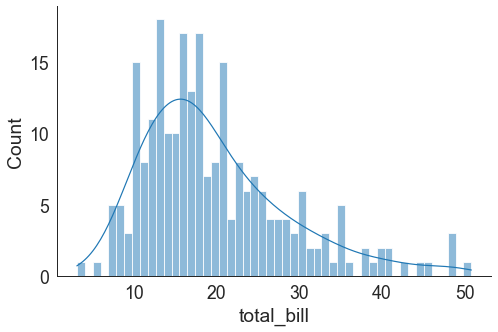

In [10]:
sns.displot(data=tips, x="total_bill", kind="hist", kde = True, bins = 50, aspect=1.5)

<h2>1.3 Gaussian Kernel Density Estimation (KDE) Plot</h2>
We can plot a KDE using the displot( ) function by supplying kind = “kde”.



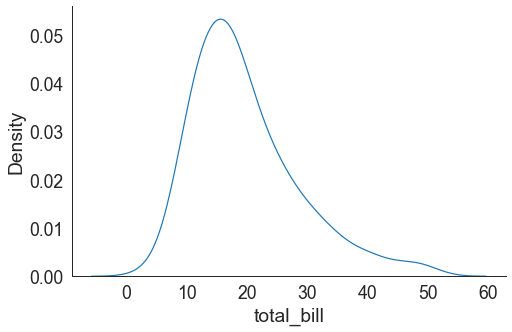

In [11]:
sns.displot(data=tips, x="total_bill", kind="kde", aspect=1.5)

<h2>1.4 ECDF plot</h2>
We can plot an ECDF using the displot( ) function by supplying kind = “ecdf”.


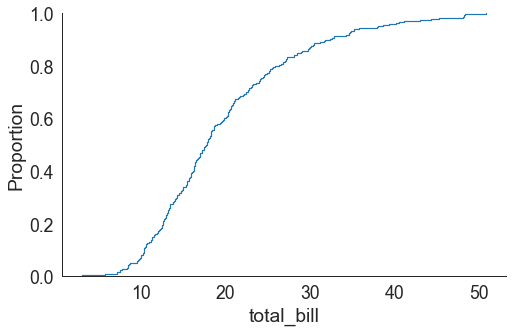

In [12]:
sns.displot(data=tips, x="total_bill", kind="ecdf", aspect=1.5)

# 2. Categorical Plot Types

<h2>2.1 Plots that shows every observation</h2>
First, we will start with plots which are very helpful in displaying individual observations. These plots are very useful when we have a small dataset.

<h3>2.1.1 Stripplot</h3>
A strip plot could be a good alternative to box or violin plot when we want to display all observations but this work fine when we have a small dataset.

Let’s see how the tips are distributed over different days. 

It comes handy if you have a figure (fig) and axis (ax) object. You could get it by using plt.subplots( ) function obtained from Matplotlib library. Here we fixed the figure size to 10 x 6. We supplied day on the x-axis and tip on the y-axis. You can add little bit randomness using jitter = True so that you could see the observations if they are overlapping. Here, I have added a point size of 8.

To make the plot visually aesthetic, I have removed the top and right spines using: sns.despine(right = True).

You can observe that people tips a big chunk during the weekend (especially Saturdays).


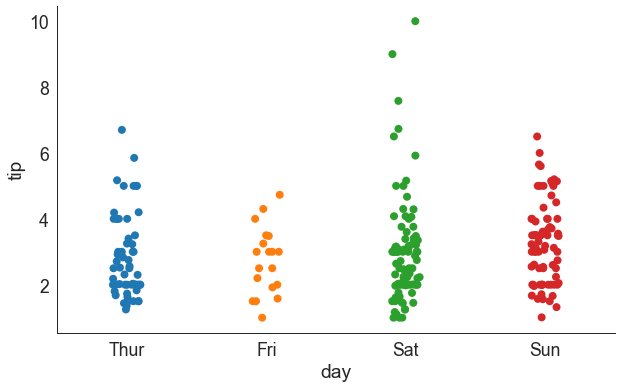

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.stripplot(x = "day",
              y = "tip",
              data = tips,
              jitter = True,
              ax = ax,
              s = 8)
sns.despine(right = True)
plt.show()


<h2>2.1.2 Swarmplot</h2>
The swarm plot is also known as a bee swarm plot. It is similar to a strip plot, but the points are adjusted along the categorical axis so that they don’t overlap. It provides a better representation of the distribution of values, but not very scalable for a large number of observations.



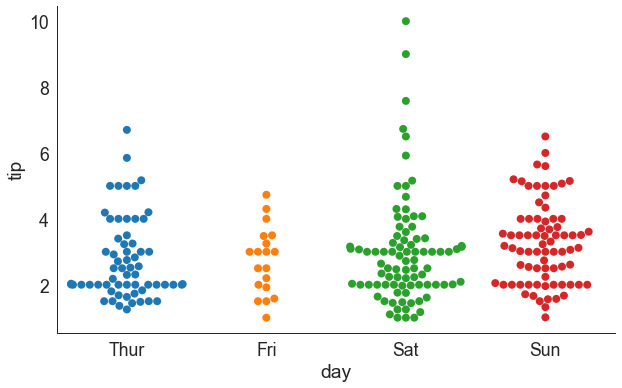

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.swarmplot(x = "day",
              y = "tip",
              data = tips,
              ax = ax,
              s = 8)
sns.despine(right = True)
plt.show()


<h2>2.2 Plots based on abstract representation </h2>
Plots with abstract information include boxplot, violin plot, and boxen (letter value plot)

<b>2.2.1 (a) Boxplot</b>
A box and whisker plot (box plot) displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile (Q1), median, third quartile (Q3), and maximum. A vertical line goes through the box at the median. The whiskers go from each quartile to the minimum or maximum.


Box plot showing five number summary
Let’s observe the median tips for each day by gender. Here, we have supplied the sex variable into hue so that it will plot the box separate for male and female with distinct filled colours.

<b>Note</b>: One thing to note that you can see the legend title is small than the labels. We will fix it in the next plot.



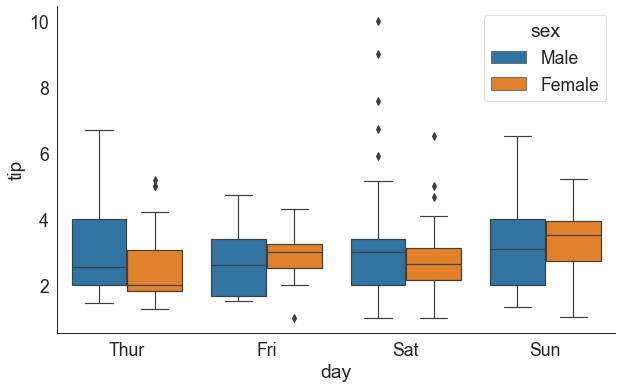

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x = "day",
            y = "tip",
            data = tips,
            ax = ax,
            hue = "sex")
sns.despine(right = True)
plt.show()

To fix the legend title and to change the legend labels, we could access the legend internals using ax.get_legend_handles_labels() and can save the outputs into handles and labels. To modify the legend we use ax.legend( ), where we supply the handles object and provide new labels string in a list. Additionally, we could increase the font and title font size.

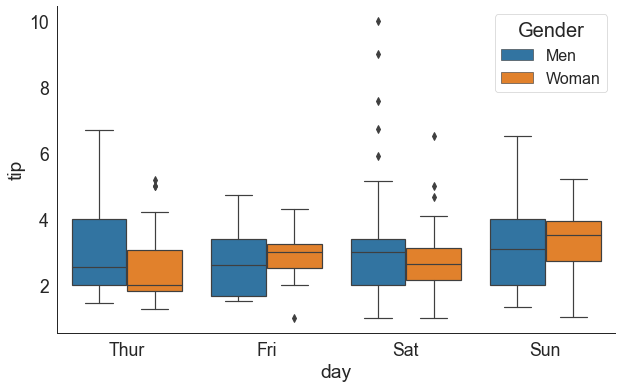

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x = "day",
              y = "tip",
              data = tips,
              ax = ax,
              hue = "sex")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Men", "Woman"], title='Gender', fontsize=16, title_fontsize=20)
sns.despine(right = True)
plt.show()

<h2>2.2.1 (b) Boxplot + Stripplot</h2>
Sometimes we need to display how the data points are distributed. We can achieve this by overlapping a stripplot on a boxplot. 


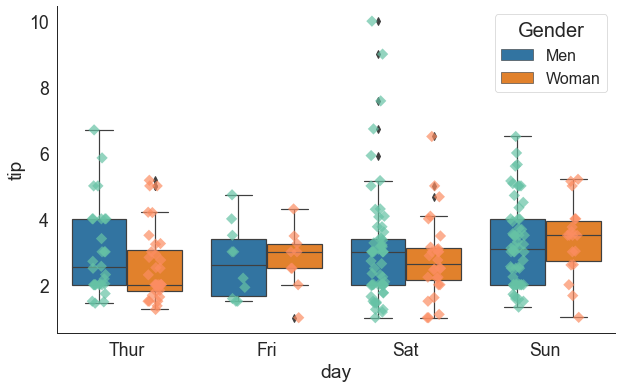

In [20]:

fig, ax = plt.subplots(figsize=(10, 6))
sns.stripplot(x = "day",
              y = "tip",
              hue = "sex",
              data = tips,
              ax = ax,
              dodge=True,
              s = 8,
              marker="D",
              palette="Set2",
              alpha = 0.7)
sns.boxplot(x = "day",
            y = "tip",
            data = tips,
            ax = ax,
            hue = "sex")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Men", "Woman"], title='Gender', fontsize=16, title_fontsize=20)
sns.despine(right = True)
plt.show()


<h2>2.2.3 Boxenplot (Letter-value plot)</h2>
The Boxenplot is also known as the letter-value plot is introduced by Heike Hofmann, Karen Kafadar and Hadley Wickham. 

Article Title: “Letter-value plots: Boxplots for large data”

The letter-value plot covers the following sort comings of box-plot: 

(1) it conveys more detailed information in the tails using letter values, but only to the depths where the letter values are reliable estimates of their corresponding quantiles and (2) outliers are labelled as those observations beyond the most extreme letter value. 


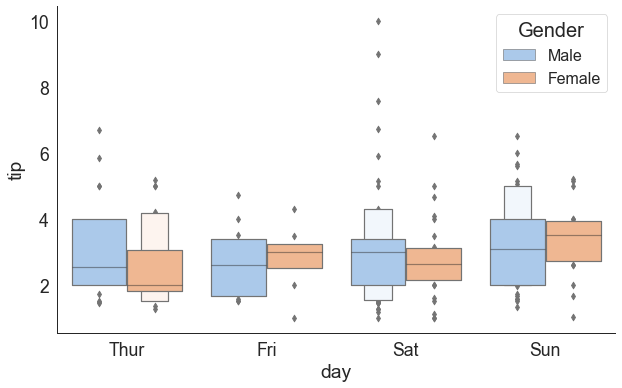

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxenplot(x = "day",
              y = "tip",
              data = tips,
              ax = ax,
              hue = "sex",
              palette="pastel")
handles, labels = ax.get_legend_handles_labels()
ax.legend(title='Gender', fontsize=16, title_fontsize=20)
sns.despine(right = True)
plt.show()

<h2>2.3 Plots with Statistical Estimates</h2>

<h3>2.3.1 Count Plot</h3>
seaborn.countplot() method is used to illustrate the counts of observations in each categorical bin using bars.

Let’s visualize how many are smoker and non-smoker across two gender groups in the tips dataset.


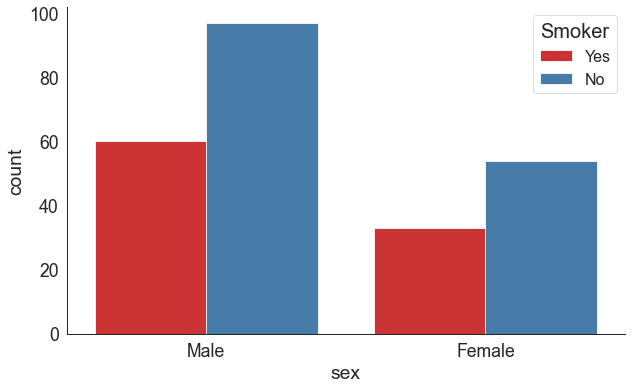

In [28]:

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x = "sex",
              data = tips,
              ax = ax,
              hue = "smoker",
              palette="Set1")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Yes", "No"], title='Smoker', fontsize=16, title_fontsize=20)
sns.despine(right = True)
plt.show()

<h2>2.3.3 Point plot</h2>

Point plots can be more useful than bar plots when one need to compare between different levels of one or more categorical variables. It is particularly helpful when one needs to understand how the levels of one categorical variable changes across levels of a second categorical variable. The lines that join each point from the same hue level allows interactions to be judged by differences in slope. The point plot shows only the mean (or other estimator) value. Here, I have added an error bars cap width of 0.1.


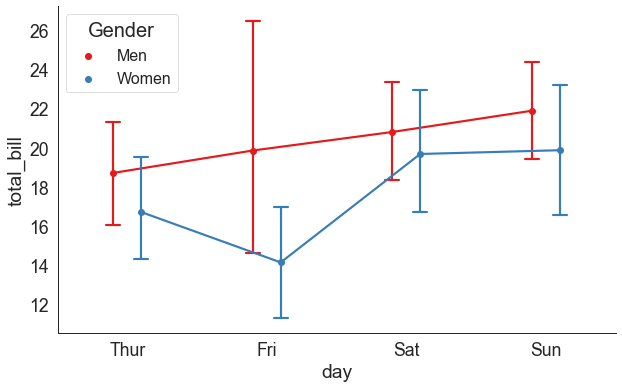

In [26]:

fig, ax = plt.subplots(figsize=(10, 6))
sns.pointplot(x = "day",
              y = "total_bill",
              data = tips,
              ax = ax,
              hue = "sex",
              capsize = .1,
              palette="Set1",
              dodge = 0.2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Men", "Women"], title='Gender', fontsize=16, title_fontsize=20)
sns.despine(right = True)
plt.show()

<h2>2.3.3 Barplot</h2>
A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. The bar plot shows only the mean (or other estimator) value.


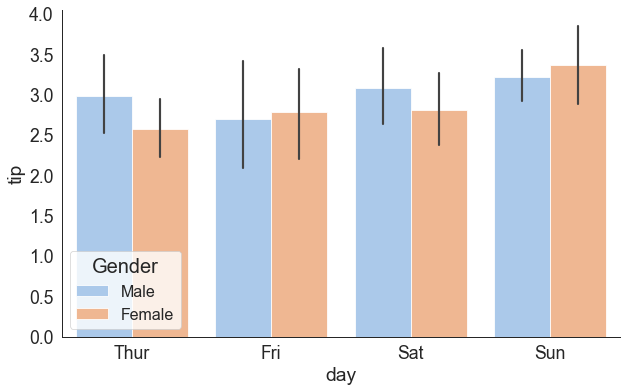

In [27]:

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = "day",
              y = "tip",
              data = tips,
              ax = ax,
              hue = "sex",
              palette="pastel")
handles, labels = ax.get_legend_handles_labels()
ax.legend(title='Gender', fontsize=16, title_fontsize=20)
sns.despine(right = True)
plt.show()


You can also change the estimator to other estimators to represent the bar hight. Here, in the below plot I have included the np.sum as an estimator so that the bar height will represent the sum in each category. To exclude the error bar I have included the ci = None argument.

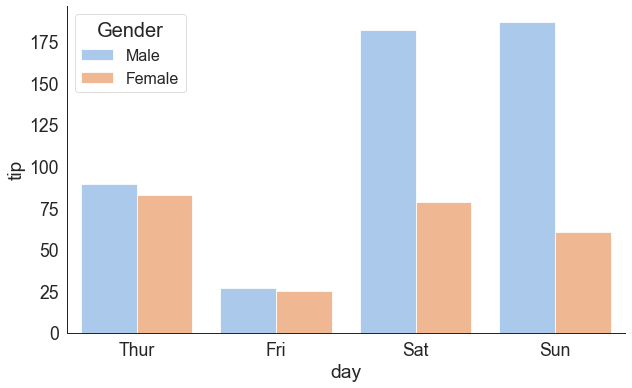

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = "day",
              y = "tip",
              data = tips,
              ax = ax,
              hue = "sex",
              palette="pastel",
              estimator = np.sum,
              ci = None)
handles, labels = ax.get_legend_handles_labels()
ax.legend(title='Gender', fontsize=16, title_fontsize=20)
sns.despine(right = True)
plt.show()

# 3. Regression Plots
Regression plots are very helpful for illustrating the relationship between two variables. This can be plotted by combining a relational scatterplot and fitting a trend line on that.


<h2>3.1 Relational Plot</h2>


<h3>3.1.1 Scatter Plot</h3>
Scatter plot is useful for illustrating the relationship between two continuous variables. To plot a scatterplot we could use the scatterplot( ) function from Seaborn library.


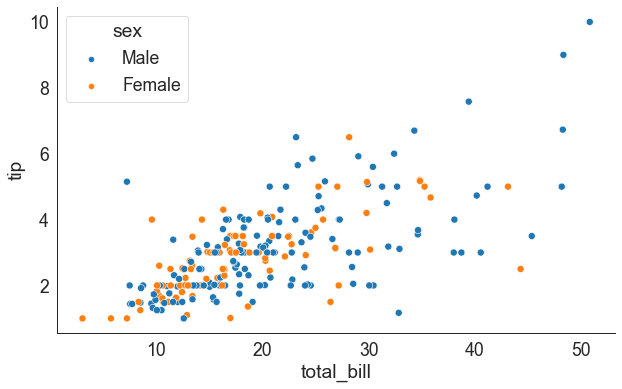

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x = "total_bill",
              y = "tip",
              data = tips,
              ax = ax,
              hue = "sex",
              s = 50)
sns.despine(right = True)
plt.show()



<h2>3.2 Regression Plot using regplot</h2>
A regression plot can be generated using either regplot( ) or lmplot( ). The regplot() performs a simple linear regression model fit while lmplot() combines regplot() and FacetGrid. Inaddition, lmplot( ) offers more customization than the regplot( ).

<h3>3.2.1 (a) Linear Regression plot</h3>
Here, we want to explore the relationship between the total bill paid and tip. We can plot this by supplying the total bill to x-axis and tip to the y-axis. Here, I have used a diamond marker (“D”) to present the point shape and coloured the points to blue. The trend line (regression line) shows a positive relationship between the total bill and tips.



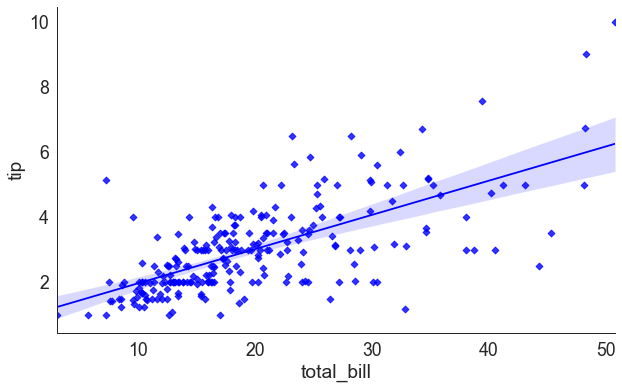

<Figure size 432x288 with 0 Axes>

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x='total_bill',
            y="tip",
            data=tips,
            marker='D',
            color='blue')
sns.despine(right = True)
plt.show()
plt.clf()

<h2>3.2.1 (b) Adding the Regression Equation</h2>
In some case, especially for publication, or presentation, you may want to include the regression equation inside the plot. The regplot( ) or lmplot( ) does not offer this functionality yet. But externally we can compute the regression slope and intercept and supply to the plot object. Here, I have used the scipy package to estimate the regression slope and intercept and added to the plot using line_kws argument.


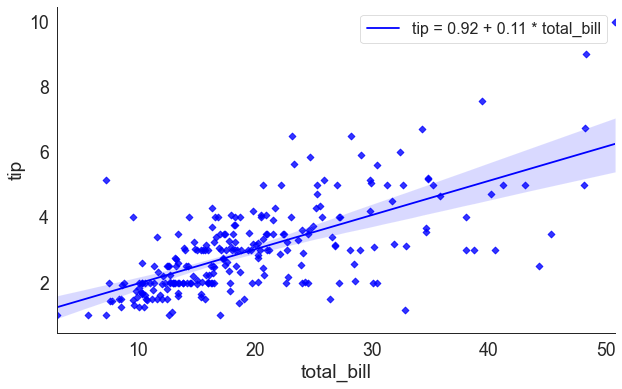

<Figure size 432x288 with 0 Axes>

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(tips['total_bill'], tips['tip'])
sns.regplot(x='total_bill',
            y="tip",
            data=tips,
            marker='D',
            color='blue', 
            line_kws={'label':"tip = {0:.2f} + {1:.2f} * total_bill".format(intercept, slope)})
sns.despine(right = True)

# Add legend
ax.legend(fontsize=16)
plt.show()
plt.clf()



# Regression Plot with Trend Line Equation

<h3>3.2.2 residplot</h3>
The residplot helps you visualize the regression residuals which also provide the validity of one of the regression’s core assumptions. The residuals should not be either systematically high or low. In the OLS context, random errors are assumed to produce residuals that are normally distributed. Therefore, the residuals should fall in a symmetrical pattern and have a constant spread throughout the range.


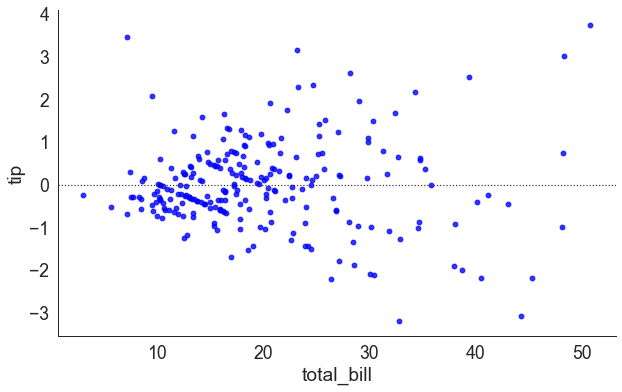

<Figure size 432x288 with 0 Axes>

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.residplot(x = 'total_bill',
            y="tip",
            data=tips,
            color='blue')
sns.despine(right = True)
plt.show()
plt.clf()

<h2>3.2.3 Non-Linear Regression Plot<h2>
In the above examples, we showed a relationship that is linear. There might be situations when the relationship between variables is non-linear. Here, to illustrate this example, we will be using the auto-mpg dataset from UCI repository.


In [40]:
auto = pd.read_csv("Datasets/auto-mpg.csv")
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Here, if we plot the relationship between weight (weight of the vehicle) and mpg (miles per gallons), we can observe the relationship is non-linear. In such cases, a non-linear fit could be much appropriate. So to plot the non-linear relationship you can increase the order argument value from 1 (default) to 2 or more.

Here, we first plotted a scatterplot, then overlayed a linear regression line and over that a regression line of order 2. You could see that the regression line of order 2 provides a better fit to the non-linear trend.

/Users/okara/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


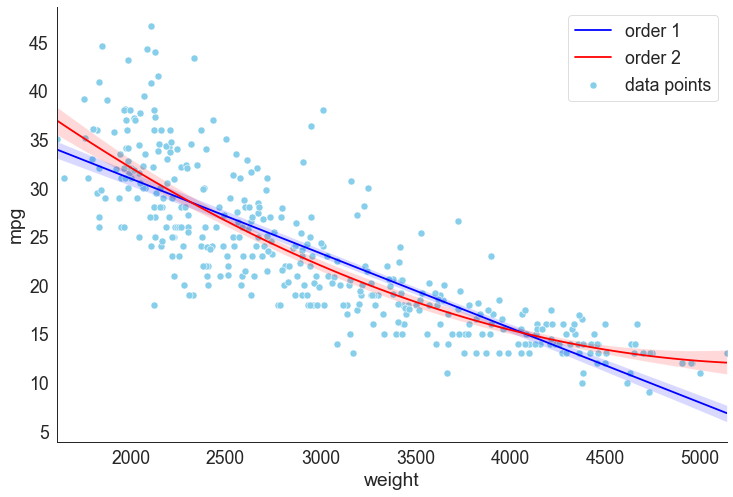

In [41]:
fig, ax = plt.subplots(figsize=(12, 8))

# Generate a scatter plot of 'weight' and 'mpg' using skyblue circles
sns.scatterplot(auto['weight'],
                auto['mpg'],
                label='data points',
                s = 50,
                color='skyblue',
                marker='o',
                ax = ax)

# Plot a blue linear regression line of order 1 between 'weight' and 'mpg'
sns.regplot(x='weight',
            y='mpg',
            data=auto,
            scatter=None,
            color='blue',
            label='order 1')

# Plot a red regression line of order 2 between 'weight' and 'mpg'
sns.regplot(x='weight',
            y='mpg',
            data=auto,
            scatter=None,
            order=2,
            color='red',
            label='order 2',
            ax = ax)
sns.despine(right = True)

# Add a legend and display the plot
plt.legend(loc='upper right')
plt.show()

# 3.3 Regression Plot using lmplot( ) 
lmplot provides more flexibility in generating regression plots. You can supply a categorical variable in hue argument to plot trend line based on the categories. Here, we provided sex into hue argument so that it plots two separate regression line based on the gender category. I also changed the default colour using palette argument.


/Users/okara/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


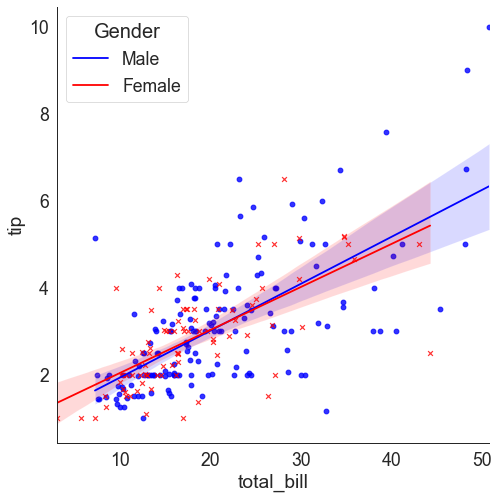

<Figure size 432x288 with 0 Axes>

In [42]:
# Create a regression plot with categorical variable
sns.lmplot(x='total_bill',
            y="tip",
            data=tips,
            hue='sex',
            markers=["o", "x"],
            palette=dict(Male="blue", Female="red"),
            size=7,
            legend=None)
plt.legend(title='Gender', loc='upper left', labels=['Male', 'Female'], title_fontsize = 20)
sns.despine(right = True)
plt.show()
plt.clf()

# 3.4 Logistic Regression Plot
Let’s plot a binary logistic regression plot. For this, we need a discrete binary variable. Let’s assume that tip amount> 3 dollars is a big tip (1) and tip amount≤ 3 is a small tip (0). We can use numpy libraries np.where( ) function to create a new binary column “big_tip”. Now we can fit a binary logistic regression using lmplot( ) by supplying the logistic = True argument.

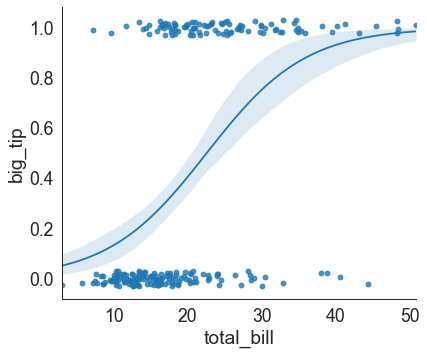

In [43]:
tips["big_tip"] = np.where(tips.tip > 3, 1, 0)
ax = sns.lmplot(x="total_bill", y="big_tip", data=tips,
                 logistic=True, n_boot=500, y_jitter=.03, aspect = 1.2)

In [47]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)

tips = sns.load_dataset("tips")
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


# 4.1 lmplot()
lmplot( ) is useful when we want to generate regression plots. The function has lots of features that make your regression visualization very easy and fun.

Here, we have generated a scatter plot with the best fit line between total_bill and tip. Next, we subsetted the plot across row and column based on sex and time variables. Next, we supplied “day” into hue to generate separate regression best fit lines for each category. Additionally, you can change the row or column order too.


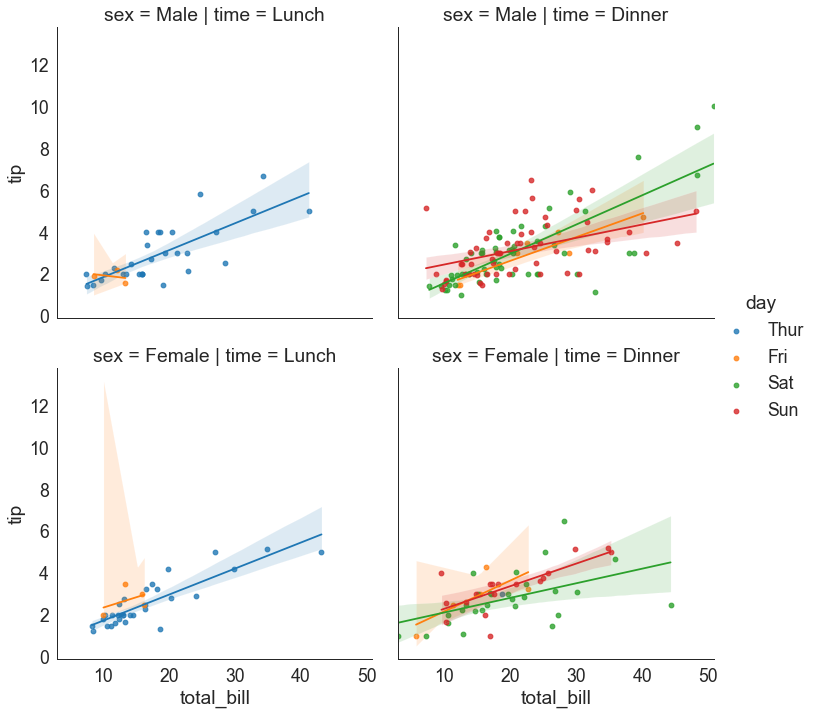

<Figure size 432x288 with 0 Axes>

In [48]:
col_order = ['Lunch','Dinner']
sns.lmplot(x = 'total_bill',
           y = 'tip',
           data = tips,
           col = "time",
           row = 'sex',
           row_order = ["Male", "Female"],
           hue = 'day',
           col_order = col_order)
plt.show()
plt.clf()

<b>load Penguins data </b>

In [51]:
# Load penguins dataset and remove na values
penguins = load_penguins()
penguins = penguins.dropna()
print(penguins.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
4       3450.0  female  2007  
5       3650.0    male  2007  


# 5 PairGrid
Seaborn’s PairGrid( ) function could be used for plotting pairwise relationships of variables in a dataset. This type of plot is very useful when we want to see the relationship between multiple variables as well as their distribution in one plot.

The pairgrid( ) plot generation requires the following steps:

First, you need to generate a PairGrid( ) plotting object. Here, we have used the penguin dataset and supplied four features for pair-wise plotting.
Next, supply a plotting function for the diagonal section using map_diag( ) function. Here we have plotted histograms for the diagonal section
Finally, supply another plot function for the off-diagonal grids using map_offdiag( ). Here we have supplied plt.scatter to generate pairwise scatterplots for off-diagonal grids.


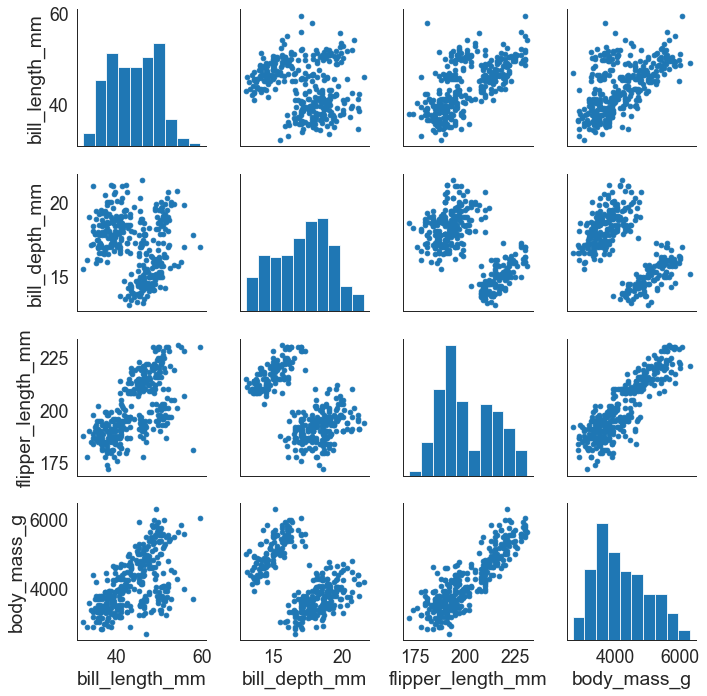

In [52]:
g = sns.PairGrid(penguins, 
                  vars=['bill_length_mm', 'bill_depth_mm',
                       'flipper_length_mm', 'body_mass_g'])
g2 = g.map_diag(plt.hist)
g3 = g2.map_offdiag(plt.scatter)
plt.show()

 <h2>5.1 Pair Plots</h2>
The pairplot is a convenience wrapper around many of the PairGrid functions. The .pairplot( ) is the quick plotting function that helps in generating PairGrid like plots for quick exploratory analysis.

This plotting function offers almost similar parameters. Here, the type of off-diagonal and diagonal plots are decided by supplying a plot function into the “kind” and diag_kind arguments respectively. You can also set colour palettes and use **kws arguments to supply additional details.

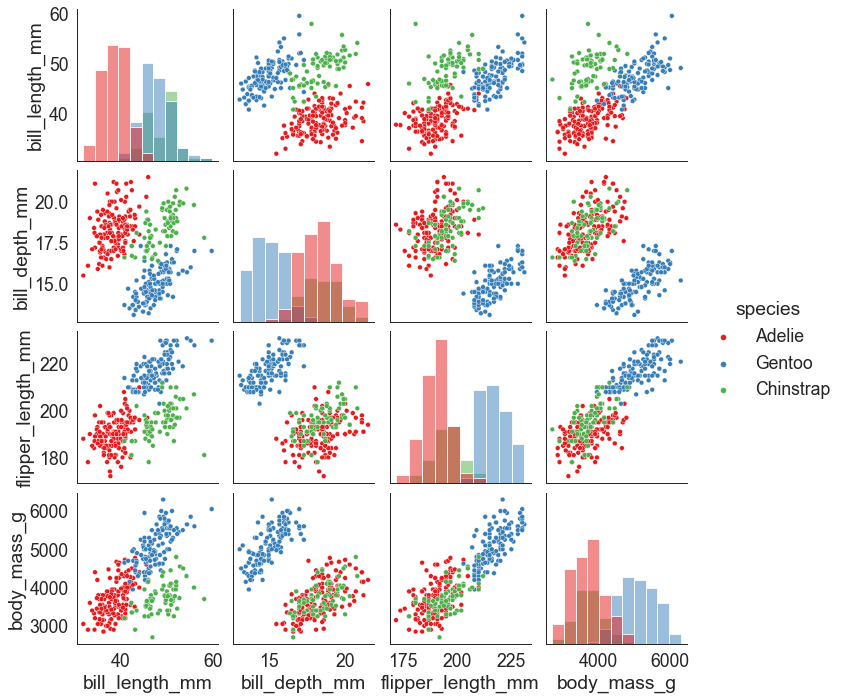

<Figure size 432x288 with 0 Axes>

In [55]:
sns.pairplot(vars = ['bill_length_mm', 'bill_depth_mm',
                       'flipper_length_mm', 'body_mass_g'],
             data = penguins,
             kind = 'scatter',
             diag_kind = "hist",
             hue = 'species',
             palette = "Set1",
             diag_kws = {'alpha':.5})
plt.show()
plt.clf()

Here, is another example of pairplot( ), where we have supplied a categorical column (Species) to hue and asked seaborn to fit regression line (kind: reg). Additionally, added Kernel Density Estimate (KDE) plots across the grid’s diagonal line.

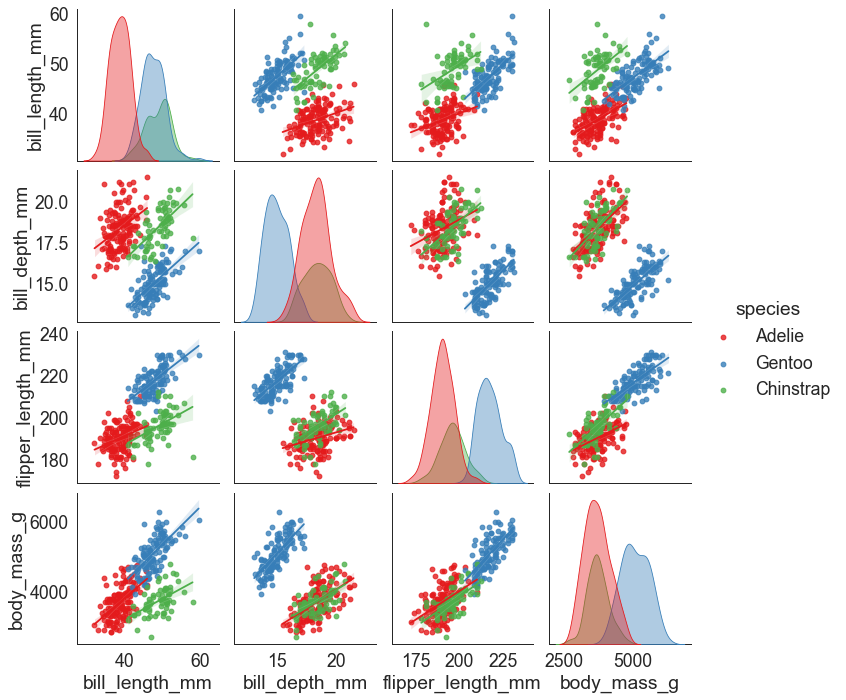

<Figure size 432x288 with 0 Axes>

In [56]:
sns.pairplot(vars = ['bill_length_mm', 'bill_depth_mm',
                       'flipper_length_mm', 'body_mass_g'],
             data = penguins,
             kind = 'reg',
             diag_kind = "kde",
             hue = 'species',
             palette = "Set1",
             diag_kws = {'alpha': 0.4})
plt.show()
plt.clf()


# 6. JointGrid()
Seaborn’s JointGrid combines univariate plots such as histograms, rug plots and kde plots with bivariate plots such as scatter and regression plots.

Let’s assume that we want to plot a bivariate plot (total_bill vs tip) and also want to plot a univariate distribution (histogram) for each variable. The plot generation comprised of the following steps:

Step1: The first step is to create a JointGrid( ) object by supplying the x-axis, y-axis variables and dataset.

Step2: Next, supply the plotting functions through a .plot( ) function. The first argument is for the bivariate plot and the second argument is for the univariate plot.


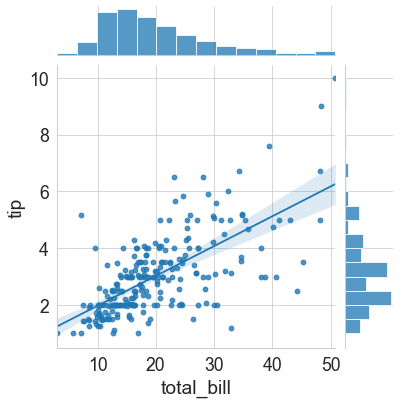

In [57]:
sns.set_style("whitegrid")
g = sns.JointGrid(x="total_bill",
                  y="tip",
                  data = tips)
g.plot(sns.regplot, sns.histplot)
plt.show()


Joint Grid plot


<h2>3.1 jointplot( )</h2>
The jointplot is a convenience wrapper around many of the JointGrid functions. It isa quick plotting function used for fast exploratory analysis. Here, we have reproduced the same plot (as discussed above) by just supplying a “reg” (regression) argument to kind parameter.


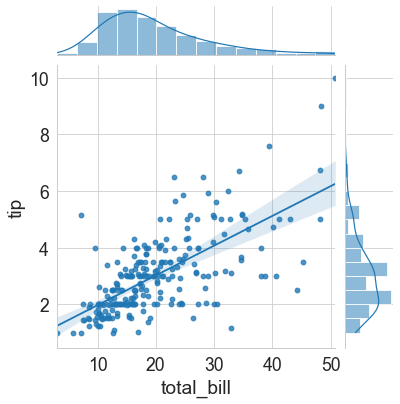

<Figure size 432x288 with 0 Axes>

In [58]:
sns.jointplot(x = "total_bill",
              y = "tip",
              kind = 'reg',
              data = tips)
plt.show()
plt.clf()

Here is an example of a residual plot generated by supplying the “resid” argument to the kind parameter.

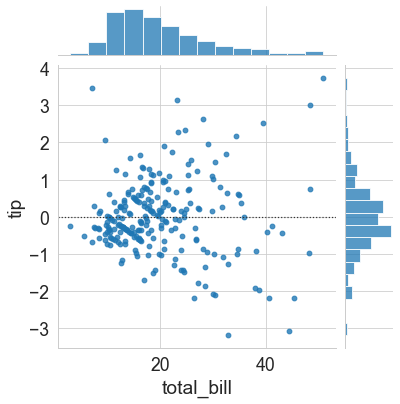

<Figure size 432x288 with 0 Axes>

In [59]:
sns.jointplot(x = "total_bill",
              y = "tip",
              kind = 'resid',
              data = tips)
plt.show()
plt.clf()


Residual plot
We can plot more sophisticated plots using jointplot( ) parameters. Even it is possible to overlay some of the JointGrid plots on top of the standard jointplot.

In the following example, we have supplied the bins argument for the histogram using marginal_kws parameter. Additionally, we added a kdeplot using the plot_join( ) method.



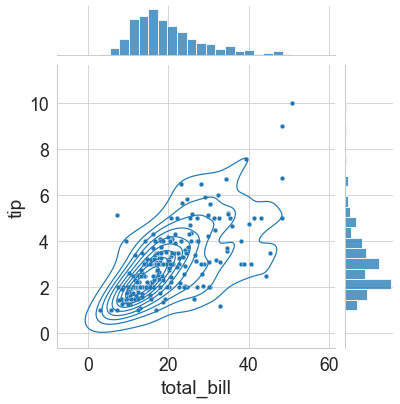

<Figure size 432x288 with 0 Axes>

In [60]:
g = (sns.jointplot(x = "total_bill",
                  y = "tip",
                  kind = 'scatter',
                  data = tips,
                  marginal_kws = {"bins": 20}).plot_joint(sns.kdeplot))
plt.show()
plt.clf()

# Scatterplot with multiple semantics

<AxesSubplot:xlabel='carat', ylabel='price'>

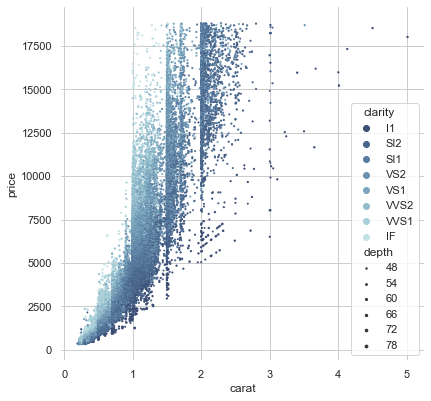

In [61]:
sns.set_theme(style="whitegrid")

# Load the example diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

# Scatterplot heatmap

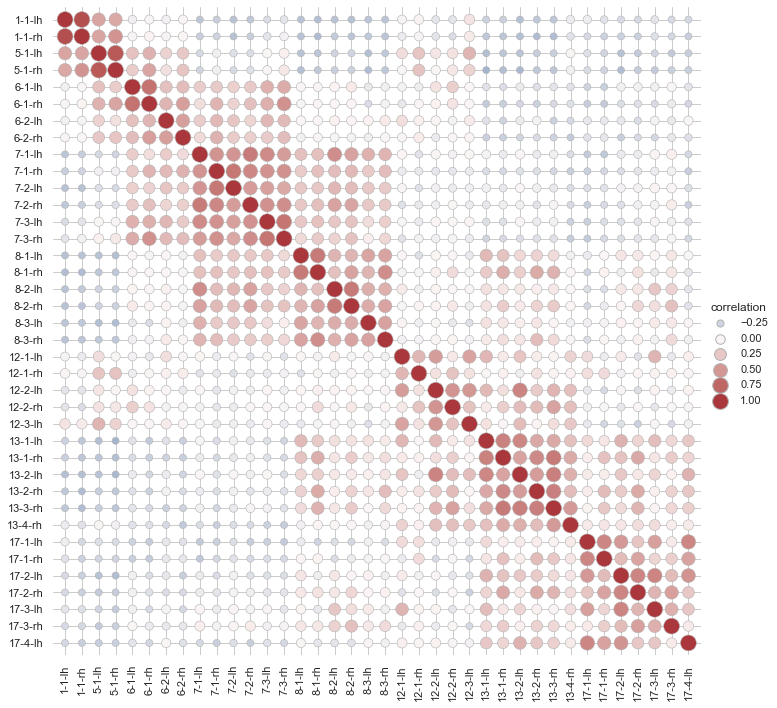

In [62]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the brain networks dataset, select subset, and collapse the multi-index
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

df.columns = df.columns.map("-".join)

# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

# Timeseries plot with error bands


<AxesSubplot:xlabel='timepoint', ylabel='signal'>

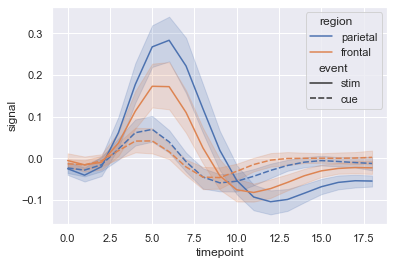

In [63]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

# Joint kernel density estimate

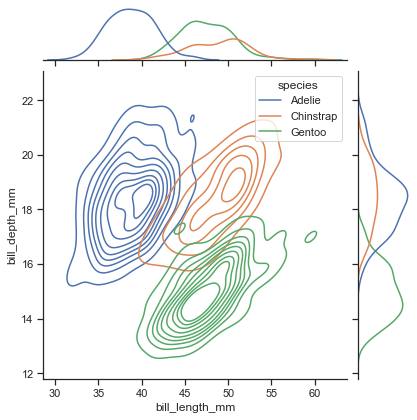

In [64]:
sns.set_theme(style="ticks")

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde",
)

# Overlapping densities (‘ridge plot’)


/Users/okara/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/okara/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


AttributeError: 'FacetGrid' object has no attribute 'refline'

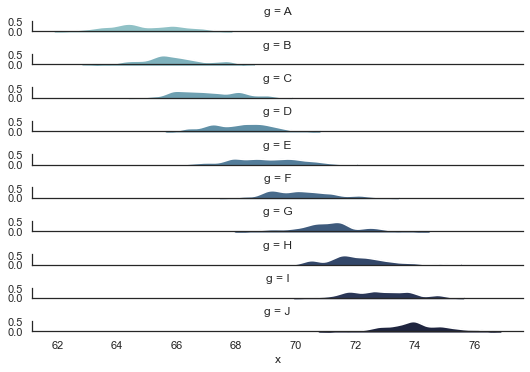

In [68]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# Bivariate plot with multiple elements


<AxesSubplot:>

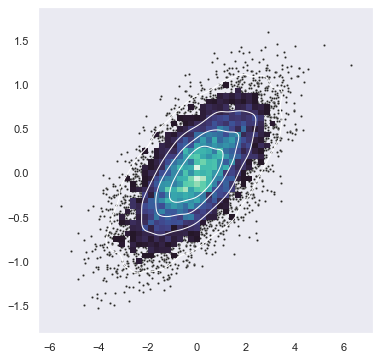

In [69]:
sns.set_theme(style="dark")

# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

# Conditional kernel density estimate

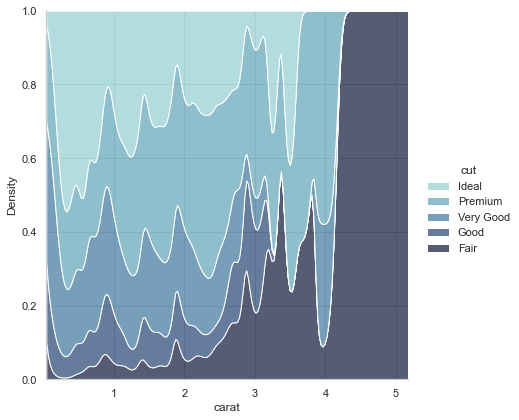

In [70]:

sns.set_theme(style="whitegrid")

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Plot the distribution of clarity ratings, conditional on carat
sns.displot(
    data=diamonds,
    x="carat", hue="cut",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

# Different cubehelix palettes

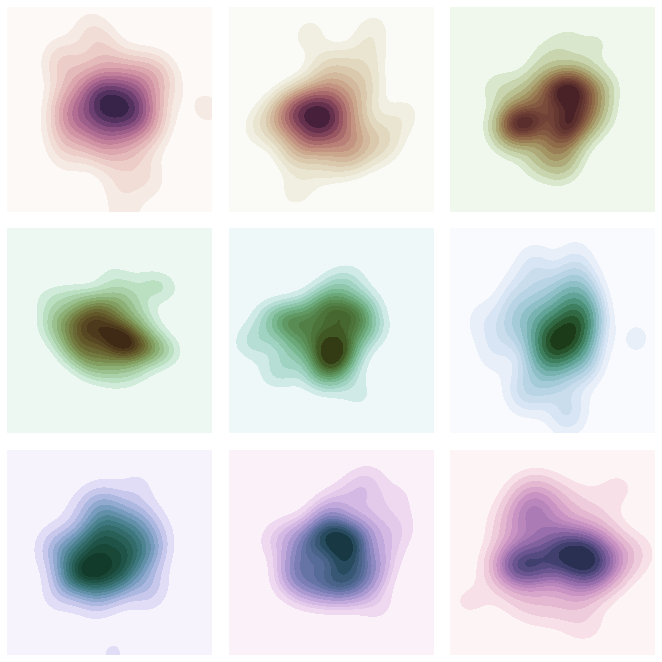

In [71]:

sns.set_theme(style="white")
rs = np.random.RandomState(50)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = rs.normal(size=(2, 50))
    sns.kdeplot(
        x=x, y=y,
        cmap=cmap, fill=True,
        clip=(-5, 5), cut=10,
        thresh=0, levels=15,
        ax=ax,
    )
    ax.set_axis_off()

ax.set(xlim=(-3.5, 3.5), ylim=(-3.5, 3.5))
f.subplots_adjust(0, 0, 1, 1, .08, .08)

# FacetGrid with custom projection

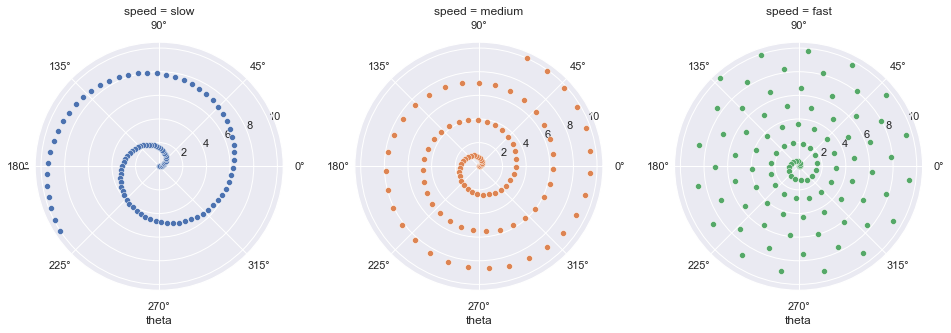

In [72]:
sns.set_theme()

# Generate an example radial datast
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'r': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})

# Convert the dataframe to long-form or "tidy" format
df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')

# Set up a grid of axes with a polar projection
g = sns.FacetGrid(df, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), height=4.5,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(sns.scatterplot, "theta", "r")

# Plotting model residuals


<AxesSubplot:>

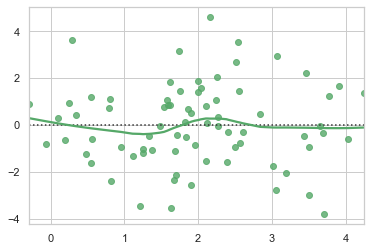

In [73]:
sns.set_theme(style="whitegrid")

# Make an example dataset with y ~ x
rs = np.random.RandomState(7)
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)

# Plot the residuals after fitting a linear model
sns.residplot(x=x, y=y, lowess=True, color="g")

# Scatterplot with varying point sizes and hues


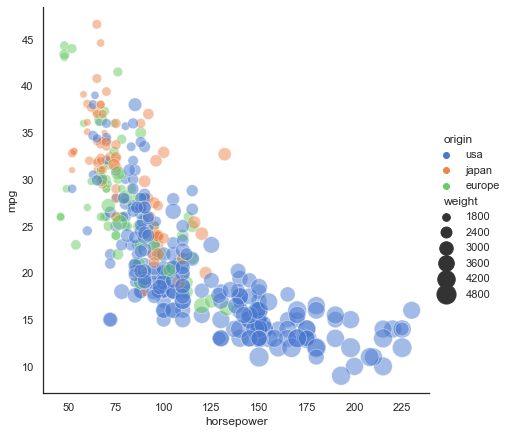

In [74]:
sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

# Scatterplot Matrix


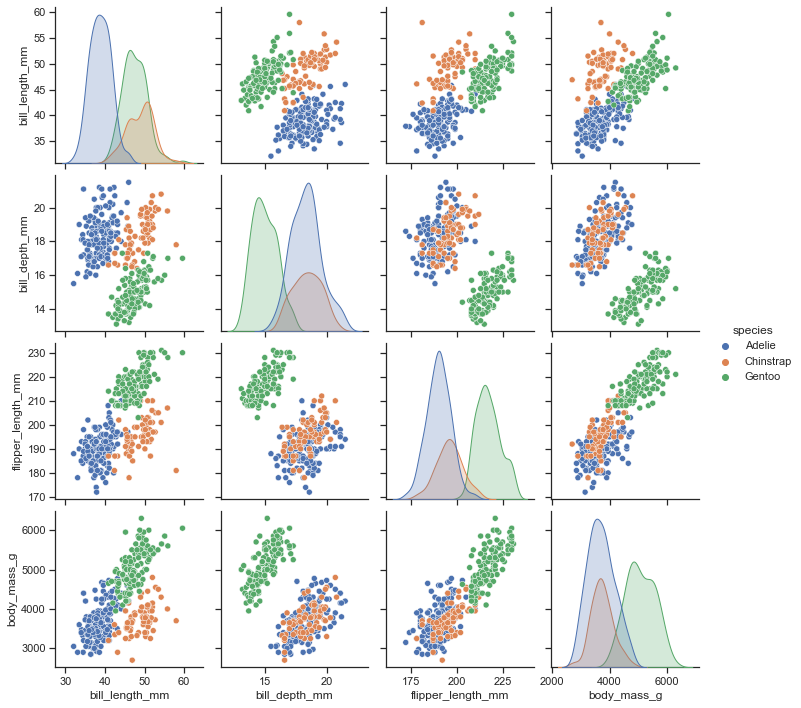

In [75]:
sns.set_theme(style="ticks")

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

# Scatterplot with continuous hues and sizes

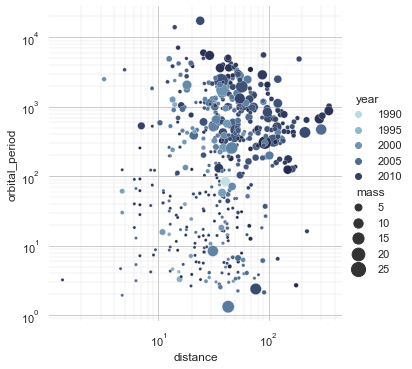

In [76]:
sns.set_theme(style="whitegrid")

# Load the example planets dataset
planets = sns.load_dataset("planets")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=planets,
    x="distance", y="orbital_period",
    hue="year", size="mass",
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

# Smooth kernel density with marginal histograms

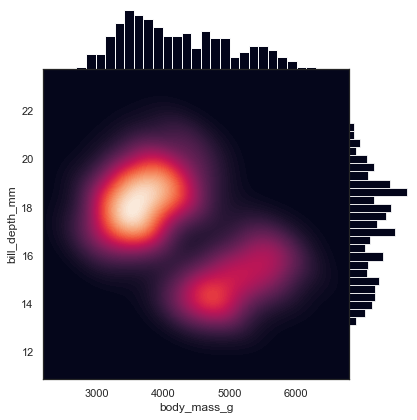

In [77]:
sns.set_theme(style="white")

df = sns.load_dataset("penguins")

g = sns.JointGrid(data=df, x="body_mass_g", y="bill_depth_mm", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((2200, 6800), (10, 25)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

# Discovering structure in heatmap data

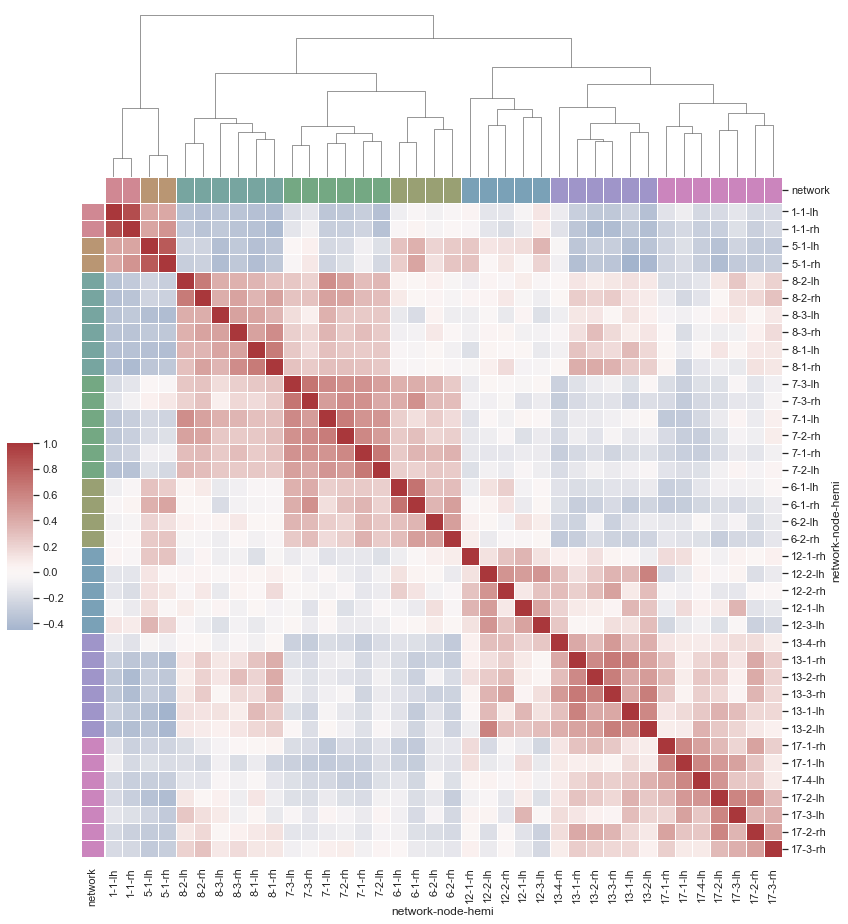

In [78]:
sns.set_theme()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
g = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()

# Trivariate histogram with two categorical variables

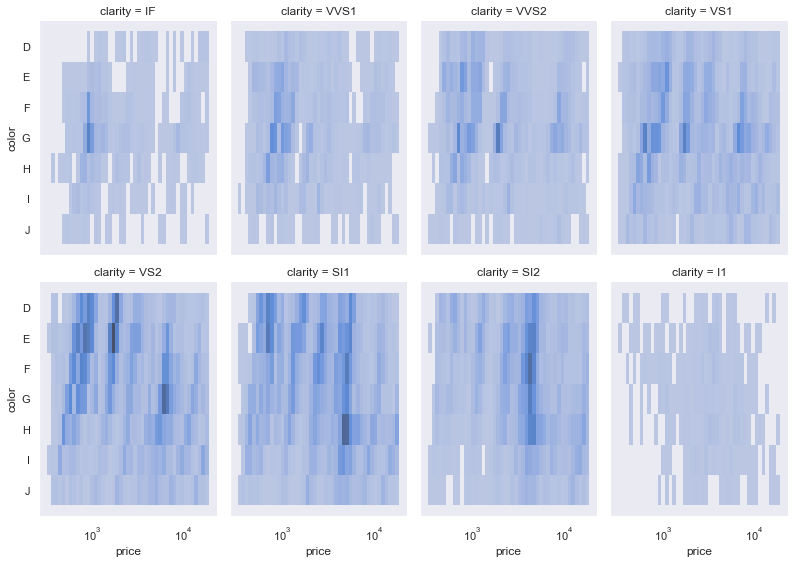

In [79]:
sns.set_theme(style="dark")

diamonds = sns.load_dataset("diamonds")
sns.displot(
    data=diamonds, x="price", y="color", col="clarity",
    log_scale=(True, False), col_wrap=4, height=4, aspect=.7,
)